<a href="https://colab.research.google.com/github/natdebandi/migmobs_exploratory/blob/main/Scholar_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scholar database


https://www.scholarlymigration.org/data.html



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/scopus_2024_V1_scholarlymigration_countryflows_enriched.txt'

df_scholar = pd.read_csv(file_path)

Mounted at /content/drive


In [5]:
df_scholar

,n_migrations,year,countrynamefrom,countrynameto,regionfrom,regionto,incomelevelfrom,incomelevelto,gdp_per_capitafrom,gdp_per_capitato,populationfrom,populationto,iso3codefrom,iso3codeto,paddedpopfrom,paddedpopto
0,1270,2014.0,United States,Germany,North America,Europe & Central Asia,HIC,HIC,55123.849787,48023.869985,318386329.0,80982500.0,USA,DEU,1339874,309351
1,131,2012.0,United States,Saudi Arabia,North America,Middle East & North Africa,HIC,HIC,51784.418574,24069.203315,313877662.0,30821543.0,USA,SAU,1254862,14795
2,1634,2003.0,Japan,United States,East Asia & Pacific,North America,HIC,HIC,35387.037420,39490.274956,127718000.0,290107933.0,JPN,USA,292444,892573
3,178,2008.0,United Kingdom,Switzerland,Europe & Central Asia,Europe & Central Asia,HIC,HIC,47396.120208,74175.192790,61806995.0,7647675.0,GBR,CHE,247231,47955
4,1137,2004.0,United States,Japan,North America,East Asia & Pacific,HIC,HIC,41724.631629,38298.980171,292805298.0,127761000.0,USA,JPN,928492,298366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92975,3,2014.0,Spain,Pakistan,Europe & Central Asia,South Asia,HIC,LMC,29513.651180,1303.185370,46480882.0,208251628.0,ESP,PAK,200813,30117
92976,3,2015.0,Kenya,Nigeria,Sub-Saharan Africa,Sub-Saharan Africa,LMC,LMC,1496.653573,2679.554223,46851488.0,183995785.0,KEN,NGA,6444,19791
92977,3,2013.0,Jordan,Algeria,Middle East & North Africa,Middle East & North Africa,LMC,LMC,4477.618321,5519.777576,7694814.0,38000626.0,JOR,DZA,5146,12705
92978,3,1999.0,Philippines,Nepal,East Asia & Pacific,South Asia,LMC,LMC,1123.163571,208.491474,76249064.0,24143157.0,PHL,NPL,1268,386


In [6]:
# prompt: transform to int in year

df_scholar['year'] = df_scholar['year'].astype(int)


Country names

Argentina

Chile

Bolivia

Venezuela



In [14]:
df_scholar_filtered = df_scholar[
    df_scholar['countrynameto'].isin(['Argentina', 'Chile'])
]
df_scholar_filtered.head()


,n_migrations,year,countrynamefrom,countrynameto,regionfrom,regionto,incomelevelfrom,incomelevelto,gdp_per_capitafrom,gdp_per_capitato,populationfrom,populationto,iso3codefrom,iso3codeto,paddedpopfrom,paddedpopto
225,19,2006,Germany,Argentina,Europe & Central Asia,Latin America & Caribbean,HIC,UMC,36353.880334,5890.978002,82376451.0,39476851.0,DEU,ARG,222103,24521
243,2,2003,Japan,Argentina,East Asia & Pacific,Latin America & Caribbean,HIC,UMC,35387.037420,3333.152904,127718000.0,38278164.0,JPN,ARG,292444,20580
277,51,2007,Spain,Chile,Europe & Central Asia,Latin America & Caribbean,HIC,HIC,32591.350307,10456.832384,45226803.0,16495538.0,ESP,CHL,142607,13940
282,97,2011,Spain,Argentina,Europe & Central Asia,Latin America & Caribbean,HIC,UMC,31677.900308,12848.739151,46742697.0,41261490.0,ESP,ARG,178055,33855
328,6,2011,Australia,Chile,East Asia & Pacific,Latin America & Caribbean,HIC,HIC,62609.660716,14637.756167,22340024.0,17173573.0,AUS,CHL,112623,19372


In [16]:

n_migrations = df_scholar_filtered.groupby(['year', 'countrynameto'])['n_migrations'].sum().reset_index()
n_migrations.head()


,year,countrynameto,n_migrations
0,1998,Argentina,212
1,1998,Chile,134
2,1999,Argentina,257
3,1999,Chile,146
4,2000,Argentina,291


In [18]:
n_migrations['year'] = n_migrations['year'].astype(int)


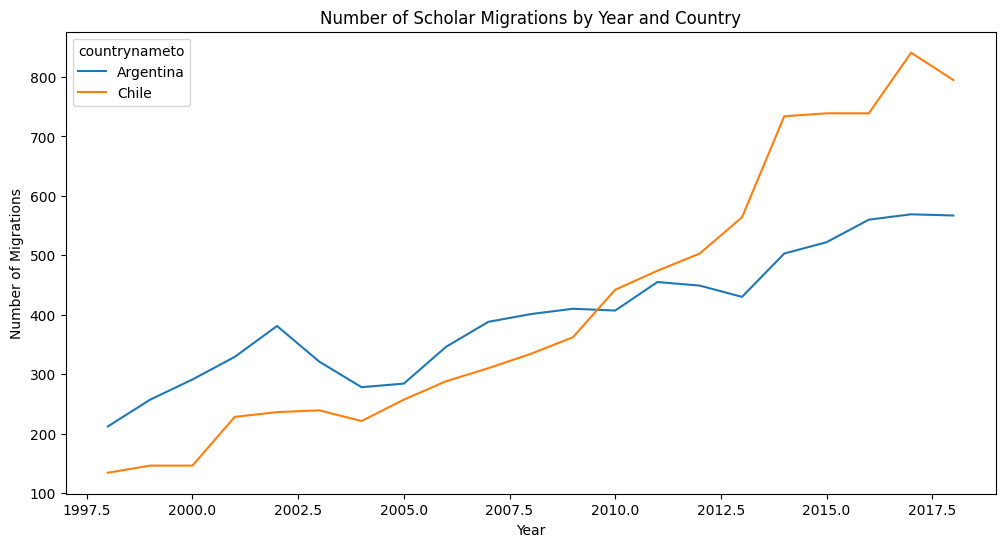

In [20]:
# prompt: plot a lineserie showing n_migrations by year and countrynameto

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='n_migrations', hue='countrynameto', data=n_migrations)
plt.title('Number of Scholar Migrations by Year and Country')
plt.xlabel('Year')
plt.ylabel('Number of Migrations')
plt.show()
